# Author : Jainish Shah

## Task 6: Prediction using Decision Tree Algorithm

#### GRIP @ The Sparks Foundation


> Decision Trees are non-parametric supervised learning method that can perform both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I created the Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.




In [3]:
# import several dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz

from sklearn import tree
import matplotlib.pyplot as plt

### Step 1 - Loading the Dataset

In [4]:
iris = datasets.load_iris()

### Step 2 - Exploratory Data Analysis

In [5]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X['Species']=iris.target
X['Species']=X['Species'].apply(lambda x: iris['target_names'][x])

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# seaking for the brief information about the Datatype used and number of 
# null values

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# checking for number of NULL values in the dataset

X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [10]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Step 3 - Data visualiztion of the loaded data

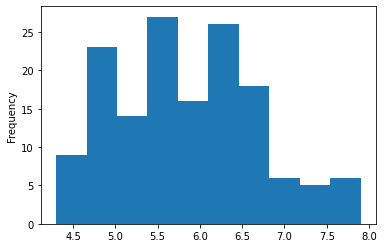

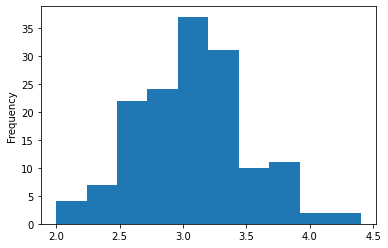

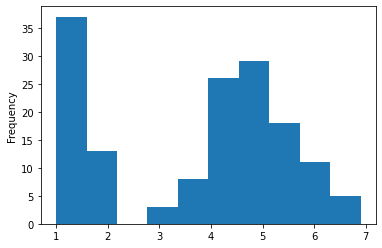

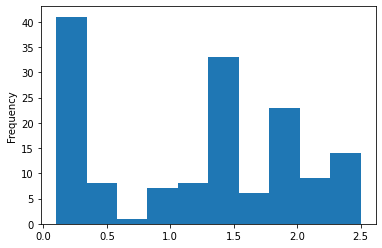

In [11]:
arr = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
for i in arr:
    X[i].plot.hist()
    plt.show()

From the above visualiation it is clear that there is pretty normal . While in the Petal Width (Cm) are having weird value among all. It hias a min value of 0.1 while max valuie as 2.5.

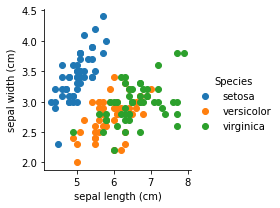

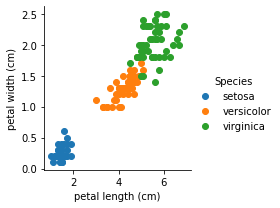

In [12]:
 # Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(X,hue='Species').map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(X,hue='Species').map(plt.scatter,'petal length (cm)','petal width (cm)').add_legend()
plt.show()


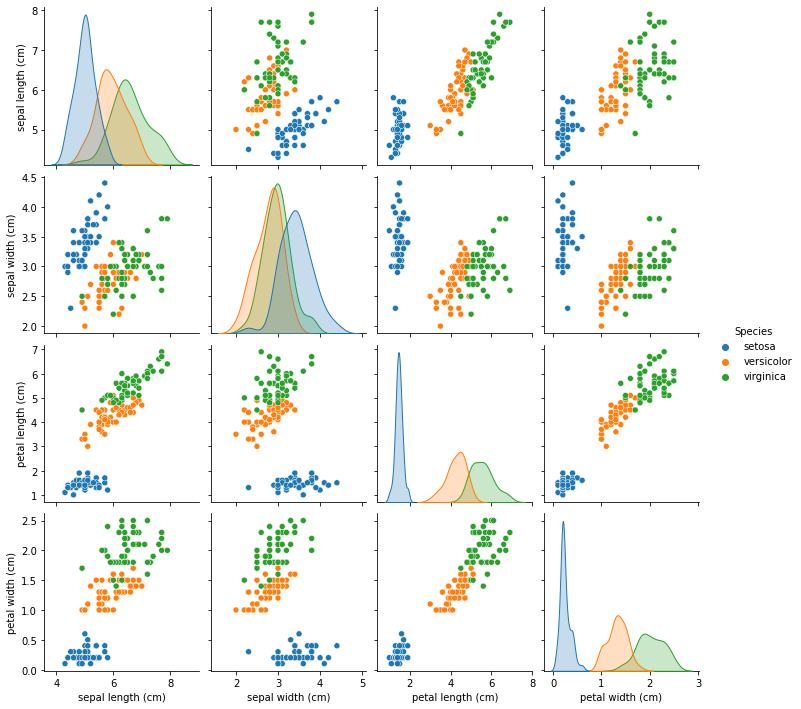

In [13]:
# checking the Relationship Between Columns
sns.pairplot(X, hue='Species')

### Step 4 - Training Decision Tree Model

Split the dataset into 70:30 for training and test dataset. Random_state is taken as 1 ( defining random_state is to make sure the splitted dataset is the same even if we split the dataset again and again)

In [14]:
inputs = X[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
op = X['Species'].values


X_train, X_test, Y_train, Y_test = train_test_split(inputs, op, test_size=0.7, random_state=1)
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, Y_train)
print("Training Complete. ")
Y_pred = tree_classifier.predict(X_test)
tree_classifier.score(X_test, Y_test)

Training Complete. 


0.9714285714285714

So from the above cell its clearly visible that the accuracy of our model is 97 %.

### Step 5 - Visualizing the trained model( Decision Tree)

In [16]:
# Install required libraries
!pip install pydotplus

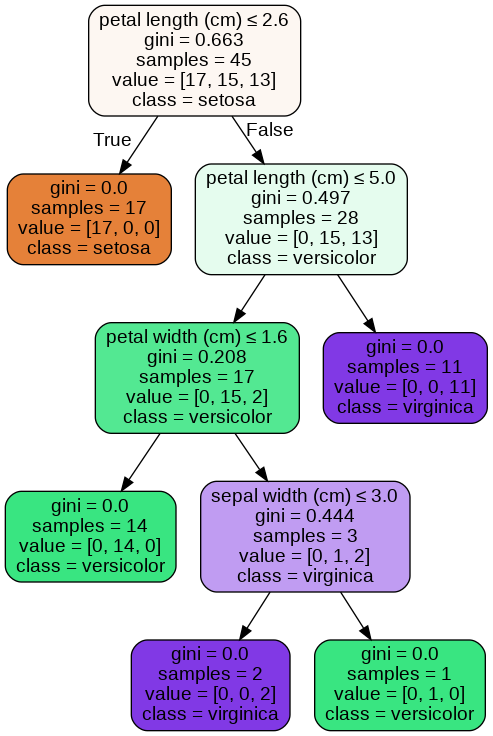

In [26]:
#Visualizing the trained Decision Tree Classifier taking all 4 features in consideration

# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
!pip install pydot
from six import StringIO

cn=['setosa','versicolor','virginica']

# Visualize the graph
dot_data = StringIO()
export_graphviz(tree_classifier,
                            out_file=dot_data, 
                            feature_names=iris.feature_names, 
                            class_names = cn,
                            filled=True, rounded=True,
                            special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Step 6 - Calculating the Model accuracy

In [28]:
# Model Accuracy
print("Accuracy:",sm.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9714285714285714
